# Handling Data

In [4]:
import sys
from pathlib import Path

# Adjust the path based on the location of your notebook
sys.path.append(str(Path().resolve().parent))

# Second cell: Import the PATH from settings
from utils.settings import PATH

print(PATH)

C:\Dev\MachineLearningGroup


In [10]:
# Importing packages to develop the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from scipy import stats
from sklearn import linear_model
# import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

Numeric feature Scaling: Changing your original variables to a similar scale could help better interpret the resulting regression coefficients. Moreover, scaling is essential when using gradient descent-based algorithms because it facilitates quicker converging to a solution.



In [16]:
dir_data = PATH / Path('0. data')
input_file = 'Boston.csv'
file_path_data = dir_data / Path(input_file)

df = pd.read_csv(file_path_data)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [17]:
X = df.drop(columns='medv')
y = df['medv']

- The StandardScaler class will rescale your variables by removing the mean, an action
also called centering. In fact, in your training set the rescaled variables will all have zero
mean and the features will be forced to the unit variance. After fitting, the class will
contain the mean_ and std_ vectors, granting you access to the means and standard
deviations that made the scaling possible. Therefore, in any following set for testing
purpose or predictions in production, you will be able to apply the exact same
transformations, thus maintaining the data consistency necessary for the algorithm to work
exactly.

- The MinMaxScaler class will rescale your variables setting a new minimum and maximum
value in the range pointed out by you. After fitting, min_ and scale_ will report the
minimum values (subtracted from the original variables) and the scale used for dividing
your variables to have the intended maximum values, respectively.

Now, as a first scaling operation, let’s just center the variables, that is, remove the mean,
and see if this action changes something in our linear regression.
StandardScaler(with_mean=True, with_std=False)
linear_regression.fit(centering.fit_transform(X),y)
Though the coefficients will remain the same, but the intercept will be a value that
has a particular meaning.

In [18]:
np.set_printoptions(precision=5, suppress=True)
linear_regression = linear_model.LinearRegression(fit_intercept=True)
linear_regression.fit(X,y)
linear_regression.coef_,linear_regression.intercept_

(array([ -0.12139,   0.04696,   0.01347,   2.83999, -18.75802,   3.65812,
          0.00361,  -1.49075,   0.2894 ,  -0.01268,  -0.93753,  -0.55202]),
 41.61727017595445)

In [19]:
centering = StandardScaler(with_mean=True, with_std=False)
linear_regression.fit(centering.fit_transform(X),y)
print("coefficients: %s\nintercept: %s" % (linear_regression.coef_,linear_regression.intercept_))

coefficients: [ -0.12139   0.04696   0.01347   2.83999 -18.75802   3.65812   0.00361
  -1.49075   0.2894   -0.01268  -0.93753  -0.55202]
intercept: 22.532806324110673


Though the coefficients have remained the same, now the intercept is 22.533, a value that has a particular meaning in our Boston Housing prices problem:

In [20]:
print('mean: %0.3f' % np.mean(y))

mean: 22.533


Having the intercept valued as the average target value means that when one or more
values are missing we expect them to automatically get a zero value if we centered the
variable, and our regression will naturally tend to output the average value of the target
variable.

Standardization: scaling everything to unit variance and mean 0

In [22]:
standardization = StandardScaler(with_mean=True, with_std=True)
linear_regression.fit(standardization.fit_transform(X),y)
print("coefficients: %s\nintercept: %0.3f" % (linear_regression.coef_,linear_regression.intercept_))

coefficients: [-1.0431   1.09422  0.0923   0.72063 -2.17149  2.56772  0.10154 -3.13599
  2.51743 -2.13527 -2.0277  -3.93811]
intercept: 22.533


As expected, now the coefficients are different, and each one now represents the unit
change in the target after a modification in the predictors’ equivalent to a standard
deviation. However, the scales are not fully comparable if the distributions of our
predictors are not normal (standardization implies a normal bell-shaped distribution), yet
we can now compare the impact of each predictor and allow both the automatic handling
of missing values and the correct functioning of advanced algorithms.

Normalization: Normalization rescales as standardization, by acting on ranges of the predictors, but it has
different properties. In fact, when using normalization the zero value is the minimum
value in the range of values of each predictor. That means that zero doesn’t represent the
mean anymore. Moreover, rescaling between the maximum and the minimum can become
misleading if there are anomalous values at either one of the extremities (most of your
values will get squeezed around a certain region in [0,1], usually in the center of the
range).

In [23]:
scaling = MinMaxScaler(feature_range=(0, 1))
linear_regression.fit(scaling.fit_transform(X),y)
print ("coefficients: %s\nintercept: %0.3f" % (linear_regression.coef_,linear_regression.intercept_))

coefficients: [-10.79993   4.69635   0.3674    2.83999  -9.1164   19.09172   0.3506
 -16.39367   6.6563   -6.64536  -8.81281 -20.00517]
intercept: 30.904


# Sampling (Train-Test Split & Stratified)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [ ]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
scaler=MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),
columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),
columns=X_test.columns)
logreg=LogisticRegression()
mod1=logreg.fit(X_train,Y_train)

In [ ]:
mod2=logreg1.fit(X_train,Y_train)
pred2=logreg1.predict(X_test)
accuracy_score(y_true=Y_test, y_pred=pred2

## ISLR Lab

In [25]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_validate, KFold, ShuffleSplit

In [29]:
dir_data = PATH / Path('0. data')
input_file = 'Auto.csv'
file_path_data = dir_data / Path(input_file)

df = pd.read_csv(file_path_data, na_values = ["?"])
df = df.drop(columns='name')
df = df.dropna() # drop all missing values
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1
393,44.0,4,97.0,52.0,2130,24.6,82,2
394,32.0,4,135.0,84.0,2295,11.6,82,1
395,28.0,4,120.0,79.0,2625,18.6,82,1


In [30]:
df['origin'] = df['origin'].astype('object') # To remove warnings
df.loc[df.origin == 1, 'origin'] = "American"
df.loc[df.origin == 2, 'origin'] = "European"
df.loc[df.origin == 3, 'origin'] = "Japanese"

In [31]:
df = pd.get_dummies(df, drop_first=True)
df = sm.add_constant(df)
df

,const,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_European,origin_Japanese
0,1.0,18.0,8,307.0,130.0,3504,12.0,70,False,False
1,1.0,15.0,8,350.0,165.0,3693,11.5,70,False,False
2,1.0,18.0,8,318.0,150.0,3436,11.0,70,False,False
3,1.0,16.0,8,304.0,150.0,3433,12.0,70,False,False
4,1.0,17.0,8,302.0,140.0,3449,10.5,70,False,False
...,...,...,...,...,...,...,...,...,...,...
392,1.0,27.0,4,140.0,86.0,2790,15.6,82,False,False
393,1.0,44.0,4,97.0,52.0,2130,24.6,82,True,False
394,1.0,32.0,4,135.0,84.0,2295,11.6,82,False,False
395,1.0,28.0,4,120.0,79.0,2625,18.6,82,False,False


In [32]:
df = df.astype(float)
df

,const,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_European,origin_Japanese
0,1.0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0.0,0.0
1,1.0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,0.0,0.0
2,1.0,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0.0,0.0
3,1.0,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,0.0,0.0
4,1.0,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
392,1.0,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,0.0,0.0
393,1.0,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,1.0,0.0
394,1.0,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,0.0,0.0
395,1.0,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,0.0,0.0


In [33]:
Auto_train, Auto_valid = train_test_split(df, test_size=196, random_state=0)
Auto_train

,const,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_European,origin_Japanese
251,1.0,20.2,8.0,302.0,139.0,3570.0,12.8,78.0,0.0,0.0
24,1.0,21.0,6.0,199.0,90.0,2648.0,15.0,70.0,0.0,0.0
263,1.0,17.7,6.0,231.0,165.0,3445.0,13.4,78.0,0.0,0.0
45,1.0,18.0,6.0,258.0,110.0,2962.0,13.5,71.0,0.0,0.0
227,1.0,19.0,6.0,225.0,100.0,3630.0,17.7,77.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
325,1.0,44.3,4.0,90.0,48.0,2085.0,21.7,80.0,1.0,0.0
194,1.0,22.5,6.0,232.0,90.0,3085.0,17.6,76.0,0.0,0.0
118,1.0,24.0,4.0,116.0,75.0,2158.0,15.5,73.0,1.0,0.0
48,1.0,18.0,6.0,250.0,88.0,3139.0,14.5,71.0,0.0,0.0


In [34]:
X = Auto_train.drop(columns=['mpg'])
y = Auto_train['mpg']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     110.8
Date:                Sat, 25 May 2024   Prob (F-statistic):           8.98e-67
Time:                        12:26:30   Log-Likelihood:                -511.25
No. Observations:                 196   AIC:                             1041.
Df Residuals:                     187   BIC:                             1070.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -22.1792      6.783     -3.270      0.001     -35.561      -8.797
cylinders          -0.0784      0.515     -0.152      0.879      -1.094       0.938
displacement        0.0193      0.012      1.645      0.102      -0.004       0.042
horsepower         -0.0136      0.019     -0.706      0.481      -0.051       0.024
weight             -0.0069      0.001     -7.791      0.000      -0.009      -0.005
acceleration        0.1675      0.132      1.273      0.205      -0.092       0.427
year                0.7975      0.074     10.836      0.000       0.652       0.943
origin_European     3.2564      0.799      4.076      0.000       1.681       4.832
origin_Japanese     2.6864      0.788      3.407      0.001       1.131       4.242
==============================================================================
Omnibus:                       16.560   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.364
Skew:                           0.530   Prob(JB):                     8.44e-06
Kurtosis:                       4.318   Cond. No.                     8.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
X_valid = Auto_valid.drop(columns=['mpg'])
y_valid = Auto_valid['mpg']

In [41]:
valid_pred = results.predict(X_valid)
np.mean((y_valid - valid_pred)**2)

10.847063403517298

# Cross-Validation & Bootstrap

k-fold CV is the most popular CV method. You will get consistent results with low variance, but it will not perform well with class-imbalanced datasets. To address this problem, we have to use stratified k-fold CV.

In [42]:
# Getting data
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80,
                                                    random_state=42, 
                                                    shuffle=True,)

# Building the model
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train, y_train) # Training

# Evaluating the model
import numpy as np
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, lgr.predict(X_test))
print("Accuracy: ", np.round(acc, 2))

Accuracy:  0.96


c:\Users\Gebruiker\.conda\envs\CreditModelling\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Here, we did not perform any cross-validation. We just split the entire dataset into a pair of train-test splits. However, this process has two major weaknesses. The performance of the model highly depends on the random state that we set in the train_test_split() function.

Note: In Scikit-learn, the KFold() function creates k-fold cross-validation. The number of folds can be specified in the n_splits hyperparameter.

k-fold CV assumes that data points are independently and identically distributed (IID). If the data points are not IID, we need to shuffle them when assigning to folds. To perform shuffling, we can set shuffle=Truein the KFold() function.

In [46]:
# Getting data
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Creating logistic regression object
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

# Creatig k-fold cross-validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performing k-fold cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lgr, X, y, cv=kf, scoring="accuracy")

# Prining CV scores
print("CV scores:", cv_scores)

# Averaging CV scores
import numpy as np
print("Average score:", np.round(cv_scores.mean(), 2))

CV scores: [0.95614 0.96491 0.90351 0.96491 0.9292 ]
Average score: 0.94


c:\Users\Gebruiker\.conda\envs\CreditModelling\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Gebruiker\.conda\envs\CreditModelling\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In Scikit-learn, the KFold() function creates k-fold cross-validation. The number of folds can be specified in the n_splits hyperparameter.

In [47]:
# Getting data
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Creating logistic regression object
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

# Creatig stratified k-fold cross-validation
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing stratified k-fold cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lgr, X, y, cv=skf, scoring="accuracy")

# Prining CV scores
print("CV scores:", cv_scores)

# Averaging CV scores
import numpy as np
print("Average score:", np.round(cv_scores.mean(), 2))

CV scores: [0.9386  0.91228 0.94737 0.95614 0.97345]
Average score: 0.95


c:\Users\Gebruiker\.conda\envs\CreditModelling\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Gebruiker\.conda\envs\CreditModelling\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In [48]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
X.shape

c:\Users\Gebruiker\.conda\envs\CreditModelling\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [49]:
y.shape

(70000,)

In [50]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Let’s simplify the problem for now and only try to identify one digit—for
example, the number 5. This “5-detector” will be an example of a binary
classifier, capable of distinguishing between just two classes, 5 and non-5.
First we’ll create the target vectors for this classification task:

In [51]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [52]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [56]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

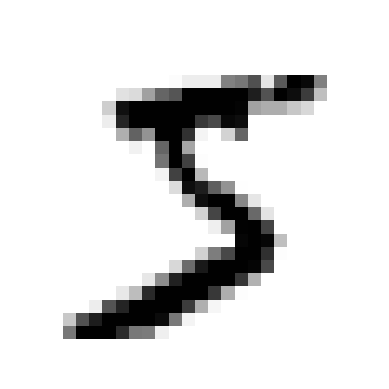

In [57]:
some_digit = X[0]

plot_digit(some_digit)

In [58]:
sgd_clf.predict([some_digit])

array([ True])

In [59]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Occasionally you will need more control over the cross-validation
process than what Scikit-Learn provides off the shelf. In these cases, you
can implement cross-validation yourself. The following code does
roughly the same thing as Scikit-Learn’s cross_val_score() function, and
it prints the same result

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3) # add shuffle=True if the dataset is not already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


Confusion Matrices: To compute the confusion matrix, you first need to have a set of predictions
so that they can be compared to the actual targets. You could make
predictions on the test set, but it’s best to keep that untouched for now
(remember that you want to use the test set only at the very end of your
project, once you have a classifier that you are ready to launch). Instead, you
can use the cross_val_predict() function:

In [61]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

How do you decide which threshold to use? First, use the cross_val_predict()
function to get the scores of all instances in the training set, but this time
specify that you want to return decision scores instead of predictions:

In [63]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [65]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [67]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=42)

In [68]:
y_probas_lr = cross_val_predict(lr_clf, X_train, y_train_5, cv=3,method="predict_proba")

c:\Users\Gebruiker\.conda\envs\CreditModelling\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Gebruiker\.conda\envs\CreditModelling\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Let’s look at the class probabilities for the first two images in the training set:

In [69]:
y_probas_lr[:2]

array([[0.08128, 0.91872],
       [0.99988, 0.00012]])

The model predicts that the first image is positive with 91% probability, and it predicts that the second image is negative with 99% probability. Since each image is either positive or negative, the probabilities in each row add up to
100%.

These are estimated probabilities, not actual probabilities. For example, if you look at all
the images that the model classified as positive with an estimated probability between 50%
and 60%, roughly 94% of them are actually positive. So, the model’s estimated
probabilities were much too low in this case—but models can be overconfident as well.
The sklearn.calibration package contains tools to calibrate the estimated probabilities and
make them much closer to actual probabilities. See the extra material section in this chapter’s notebook for more details.

The second column contains the estimated probabilities for the positive class

In [71]:
y_scores_forest = y_probas_lr[:, 1]

In [72]:
roc_auc_score(y_train_5, y_scores_forest)

0.9748672266242666

# ISLR Exercise

In [74]:
dir_data = PATH / Path('0. data')
input_file = 'Default.csv'
file_path_data = dir_data / Path(input_file)

df = pd.read_csv(file_path_data)
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [75]:
X = df[["balance", "income"]]
y = df["default"]
clf = LogisticRegression(penalty = "none", solver = "lbfgs") # None = L2 automatically!!!!
clf.fit(X, y)
clf.coef_

c:\Users\Gebruiker\.conda\envs\CreditModelling\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


array([[0.00565, 0.00002]])

I will use a 75-25 split when dividing my data into a training set and a validation set. To split the data into a training set and a validation set, we use train_test_split(). Note that we passed a value to the random_state argument to have reproducible results. After fitting the logistic regression model using the training observations, scikit-learn performs steps 3 and 4 (obtaining predictions using a posterior probability threshold of 0.5 and then computing the validation set accuracy) in a single step via the score() function. Note that if we wished to make predictions using a posterior probability threshold other than 0.5, we would want to use the predict_proba() function to obtain the posterior probabilities of each class for each observation in the validation set.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df[["balance", "income"]], df["default"], test_size = 0.25, random_state = 312)
clf = LogisticRegression(penalty = "none", solver = "lbfgs")
clf.fit(X_train, y_train)
1 - clf.score(X_test, y_test)

c:\Users\Gebruiker\.conda\envs\CreditModelling\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


0.02839999999999998

For this train-test split, we had a validation set error of 0.0284, or 2.84% of the observations in the validation set that are misclassified.